In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [118]:
# Read in the csvs that we will use
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

# Observations

In [119]:
total_observations = observations['observations'].sum()
total_observations

3314739

In [120]:
# Use GroupBy() to compute the total observations for each park
df = observations.groupby('park_name').sum()
df = df.reset_index(level=0)
# Altering park names
df.park_name = df.park_name.str.strip('National Park')
df

,park_name,observations
0,Bryce,576025
1,Great Smoky Mountains,431820
2,Yellowstone,1443562
3,Yosemite,863332


In [121]:
df['proportion_of_total'] = df['observations']/total_observations
df

,park_name,observations,proportion_of_total
0,Bryce,576025,0.173777
1,Great Smoky Mountains,431820,0.130273
2,Yellowstone,1443562,0.435498
3,Yosemite,863332,0.260452


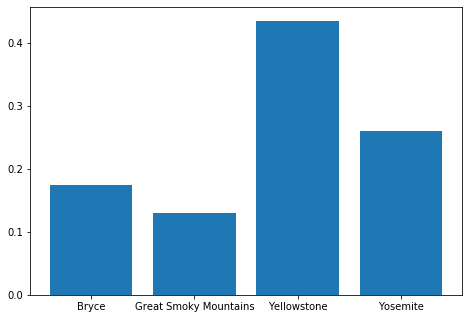

In [122]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['park_name'],df['proportion_of_total'])
# Fontsize of tick labels
plt.xticks(fontsize=10)
plt.show()

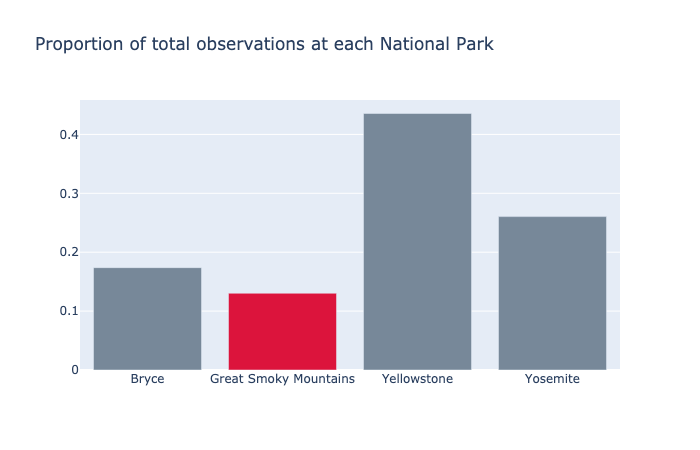

In [140]:
colors = ['lightslategray',] * 4
colors[1] = 'crimson'
fig = go.Figure([go.Bar(
    x = df['park_name'],
    y = df['proportion_of_total'],
    marker_color = colors)])
fig.update_layout(title_text="Proportion of total observations at each National Park",)
fig.show("png")

In [124]:
grouped = observations.groupby(observations.park_name)
yosemite = grouped.get_group("Yosemite National Park")
yosemite

,scientific_name,park_name,observations
2,Prunus subcordata,Yosemite National Park,138
5,Elymus virginicus var. virginicus,Yosemite National Park,112
8,Lysimachia quadrifolia,Yosemite National Park,168
16,Quercus bicolor,Yosemite National Park,143
17,Muhlenbergia rigens,Yosemite National Park,165
...,...,...,...
23267,Oxalis corniculata,Yosemite National Park,164
23276,Carex crebriflora,Yosemite National Park,181
23291,Croton monanthogynus,Yosemite National Park,173
23294,Dicranella rufescens,Yosemite National Park,171


In [125]:
observations.shape

(23296, 3)

In [126]:
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [127]:
# Iterating the columns in observations
for col in observations.columns:
    print(col)

scientific_name
park_name
observations


In [128]:
observations_names = observations['scientific_name'].unique()
print(observations_names)
print(len(observations_names))

['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']
5541


In [129]:
observations_parks = observations['park_name'].unique()
print(observations_parks)
print(len(observations_parks))

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
4


# Species

In [130]:
species_info.shape

(5824, 4)

In [131]:
print(species_info.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [132]:
# Iterating the columns in species_info
for col in species_info.columns:
    print(col)

category
scientific_name
common_names
conservation_status
